In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [12]:
#comparing relative survival by gender 
MF_grouped = train_df.groupby(['Sex'],as_index=False).mean()
MF_grouped.head()

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
1,male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


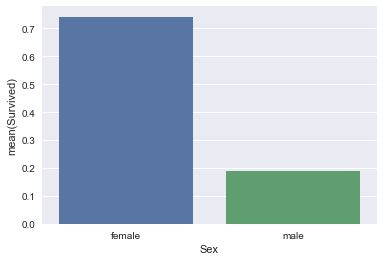

In [14]:
#plotting bargraph comparing survival by gender 
sns.barplot(x = 'Sex', y = 'Survived', data = MF_grouped)

In [16]:
#create function to impute missing age values. I'm taking median of age for the passengers in the same class
def RetAgeAdjusted(DF):
    I = pd.isnull(DF['Age'])
    I2 = (DF['Pclass']==1)*(np.isnan(DF['Age'])!=True)
    m1 = np.median(DF['Age'][I2])
    
    I2 = (DF['Pclass']==2)*(np.isnan(DF['Age'])!=True)
    m2 = np.median(DF['Age'][I2])

    I2 = (DF['Pclass']==3)*(np.isnan(DF['Age'])!=True)
    m3 = np.median(DF['Age'][I2])

    print m1 
    print m2 
    print m3
    
    for i in range(0,len(I)):
        if I[i]==True:
            if DF['Pclass'][i]==1:
                DF['Age'][i] = m1
            elif DF['Pclass'][i]==2:
                DF['Age'][i] = m2
            else:
                DF['Age'][i] = m3
    return DF

#apparently test has a few missing fare values, replacing them with the median values in their class
def RetFareAdjusted(DF):
    I = pd.isnull(DF['Fare'])
    I2 = (DF['Pclass']==1)*(np.isnan(DF['Fare'])!=True)
    m1 = np.median(DF['Fare'][I2])
    
    I2 = (DF['Pclass']==2)*(np.isnan(DF['Fare'])!=True)
    m2 = np.median(DF['Fare'][I2])

    I2 = (DF['Pclass']==3)*(np.isnan(DF['Fare'])!=True)
    m3 = np.median(DF['Fare'][I2])

    print m1 
    print m2 
    print m3
    
    for i in range(0,len(I)):
        if I[i]==True:
            if DF['Pclass'][i]==1:
                DF['Fare'][i] = m1
            elif DF['Pclass'][i]==2:
                DF['Fare'][i] = m2
            else:
                DF['Fare'][i] = m3
    return DF




In [18]:
train_df = pd.DataFrame(RetAgeAdjusted(train_df))
train_df.head()

37.0
29.0
24.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [19]:
#group by passenger class to see if there is any relation between passenger class and survival 
PclassGrouped = train_df.groupby(['Pclass'],as_index=False).mean()
PclassGrouped.head()

,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,461.597222,0.629630,38.062130,0.416667,0.356481,84.154687
1,2,445.956522,0.472826,29.825163,0.402174,0.380435,20.662183
2,3,439.154786,0.242363,24.824684,0.615071,0.393075,13.675550


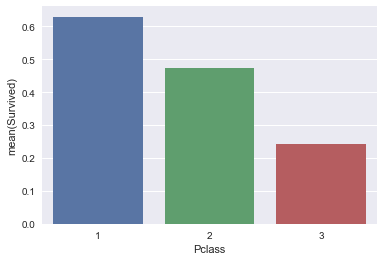

In [20]:
sns.barplot(x='Pclass',y='Survived',data=PclassGrouped)

In [37]:
#group by Fare to see if there is any relation between passenger class and survival 
#create functions ot identify Child, Female, Senior Citizen boolean categories. Also 1st, 2nd and 3rd class categories
def RetBoolFemale(MF):
    I = MF=='female'
    L = pd.Series([0]*len(MF))
    L[I] = np.ones(sum(I))
    return L
    
def RetBoolChild(Age):
    I = Age<14
    L = pd.Series([0]*len(Age))
    L[I] = np.ones(sum(I))
    return L

def RetBoolSenior(Age):
    #assumimng age for senior citizens was 55 back in the day
    I = Age>=65
    L = pd.Series([0]*len(Age))
    L[I] = np.ones(sum(I))
    return L

def RetFirst(Class):
    I = Class==1
    L = pd.Series([0]*len(Class))
    L[I] = np.ones(sum(I))
    return L

def RetSecond(Class):
    I = Class==2
    L = pd.Series([0]*len(Class))
    L[I] = np.ones(sum(I))
    return L

def RetThird(Class):
    I = Class==3
    L = pd.Series([0]*len(Class))
    L[I] = np.ones(sum(I))
    return L


In [38]:
#adding the new columns to the data frame 

train_df['Female'] = RetBoolFemale(train_df['Sex'])
train_df['Child'] = RetBoolChild(train_df['Age'])
train_df['Senior'] = RetBoolSenior(train_df['Age'])
train_df['FirstClass'] = RetFirst(train_df['Pclass'])
train_df['SecondClass'] = RetSecond(train_df['Pclass'])


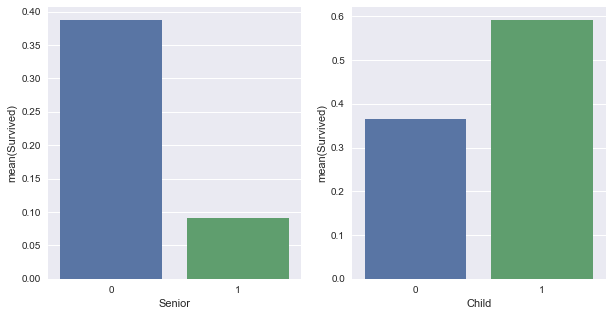

In [39]:
#Performing three groupby's together 
SeniorGrouped = train_df.groupby(['Senior'],as_index=False).mean()
ChildGrouped = train_df.groupby(['Child'],as_index=False).mean()

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

sns.barplot(x='Senior',y='Survived',data=SeniorGrouped, ax = axis1)
sns.barplot(x='Child',y='Survived',data=ChildGrouped, ax = axis2)

In [50]:
#Now testing if Senior + class makes any difference 
SeniorClass = train_df.groupby(['Senior','Pclass'], as_index=False).mean()
SeniorClass.head()

,Senior,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare,Female,Child,FirstClass,SecondClass
0,0,1,462.976190,0.642857,37.140095,0.423810,0.357143,85.255833,0.447619,0.019048,1,0
1,0,2,446.972527,0.478022,29.405659,0.406593,0.384615,20.773855,0.417582,0.098901,0,1
2,0,3,439.293033,0.243852,24.547992,0.618852,0.395492,13.711926,0.295082,0.100410,0,0
3,1,1,413.333333,0.166667,70.333333,0.166667,0.333333,45.614600,0.000000,0.000000,1,0
4,1,2,353.500000,0.000000,68.000000,0.000000,0.000000,10.500000,0.000000,0.000000,0,1


In [56]:

I = (SeniorClass['Senior']==1)
SeniorClass1 = SeniorClass[I]
SeniorClass1.head()

,Senior,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare,Female,Child,FirstClass,SecondClass
3,1,1,413.333333,0.166667,70.333333,0.166667,0.333333,45.614600,0,0,1,0
4,1,2,353.500000,0.000000,68.000000,0.000000,0.000000,10.500000,0,0,0,1
5,1,3,416.666667,0.000000,69.833333,0.000000,0.000000,7.758333,0,0,0,0


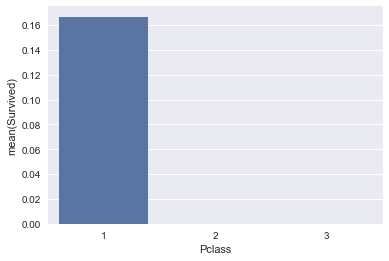

In [57]:
sns.barplot(x='Pclass',y='Survived',data=SeniorClass1)

In [58]:
#constructing a boolean variable for family 
def RetBoolFamily(SibSp,Parch):
    I = (SibSp + Parch)>0
    L = pd.Series([0]*len(SibSp))
    L[I] = np.ones(sum(I))
    return L


In [59]:
train_df['Family'] = RetBoolFamily(train_df['SibSp'],train_df['Parch'])

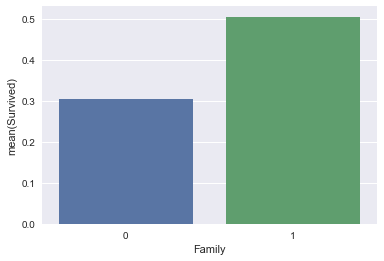

In [60]:
FamilyGrouped = train_df.groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family',y='Survived',data=FamilyGrouped)

In [62]:
from sklearn.decomposition import PCA

In [79]:
Dat = train_df.drop(['Pclass','Ticket','Cabin','Embarked','Sex','Name','PassengerId','Survived'],axis=1)
pca_obj = PCA(n_components=2)
pca.fit(Dat)
DatRed = pca.transform(Dat)


c:\python27\lib\site-packages\ipykernel\__main__.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


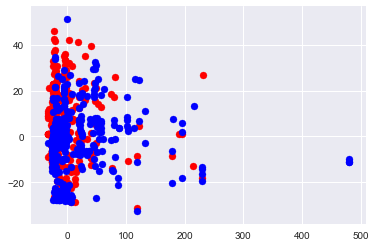

In [81]:
#coloring by survived Vs non-survived 
I0 = train_df['Survived']==0
I1 = train_df['Survived']==1
plt.hold(True)
plt.scatter(DatRed[I0,0], DatRed[I0,1],color='r') 
plt.scatter(DatRed[I1,0], DatRed[I1,1],color='b') 

In [82]:
import os 

In [86]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [84]:
FileNames = os.listdir('E:/KaggleChallenges/TitanicSurvival/')
print FileNames

['.ipynb_checkpoints', 'gender_submission.csv', 'Python-2.7.13', 'Python-2.7.13.tgz', 'StatisticalAnalysisTitanic.ipynb', 'StatisticalVisualization.ipynb', 'test.csv', 'TestingDataSet_prelim.ipynb', 'titanic1.csv', 'titanic2.csv', 'titanic3.csv', 'titanic4.csv', 'titanic5.csv', 'titanic6.csv', 'titanic7.csv', 'titanic8.csv', 'train.csv']
